In [42]:
import pandas as pd
from pathlib import Path

p = Path("../data")
for csv in p.glob("*.csv"):
    if csv.stem in ["wind", "solar"]:
        continue
    print(csv)
    df = pd.read_csv(csv, parse_dates=["timestamp"], index_col="timestamp")
    df_ = df.resample("15T").interpolate()
    df_["energy"] *= -1
    processed_dir = csv.parent / "processed"
    processed_dir.mkdir(exist_ok=True)
    df_.head(96).to_csv(processed_dir / (csv.stem + "_15min.csv"))

../data/industrial_data.csv
../data/residential_data.csv
../data/EV.csv


/tmp/ipykernel_118755/1704571100.py:10: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_ = df.resample("15T").interpolate()
/tmp/ipykernel_118755/1704571100.py:10: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_ = df.resample("15T").interpolate()
/tmp/ipykernel_118755/1704571100.py:10: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_ = df.resample("15T").interpolate()


In [36]:
df_.head(96)

,energy
timestamp,
2016-10-01 00:00:00,-8.0200
2016-10-01 00:15:00,-7.9500
2016-10-01 00:30:00,-7.8800
2016-10-01 00:45:00,-7.8100
2016-10-01 01:00:00,-7.7400
...,...
2016-10-01 22:45:00,-8.0675
2016-10-01 23:00:00,-8.0200
2016-10-01 23:15:00,-8.0275


In [47]:
csv = Path("../data/solar.csv")
df = pd.read_csv(
    csv,
    parse_dates=["timestamp"],
    date_parser=lambda x: pd.to_datetime(x, format="%Y%m%d:%H%M"),
    index_col="timestamp",
)
df_ = df.resample("15T").interpolate()
df_["Power"] /= 1000
processed_dir = csv.parent / "processed"
processed_dir.mkdir(exist_ok=True)
df_.head(96).to_csv(processed_dir / (csv.stem + "_15min.csv"))

/tmp/ipykernel_118755/3797304647.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(csv, parse_dates=["timestamp"], date_parser=lambda x: pd.to_datetime(x, format='%Y%m%d:%H%M'), index_col="timestamp")
/tmp/ipykernel_118755/3797304647.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_ = df.resample("15T").interpolate()


<Axes: xlabel='timestamp'>

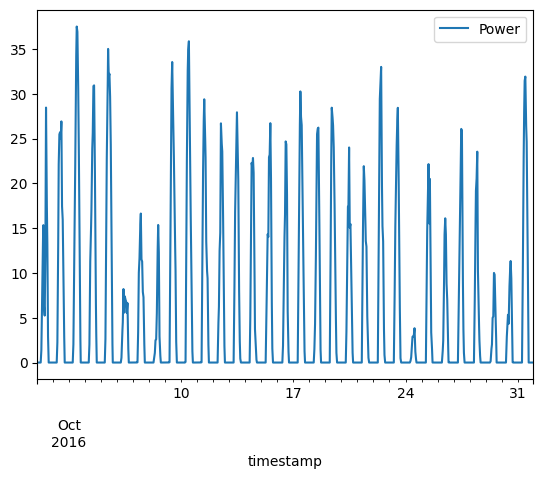

In [48]:
df_.plot()

In [ ]:
csv = Path("../data/wind.csv")
df = pd.read_csv(
    csv,
    parse_dates=["timestamp"],
    date_parser=lambda x: pd.to_datetime(x, format="%d/%m/%Y %H:%M"),
    index_col="timestamp",
)
df_ = df.resample("15T").interpolate()
df_["Power"] = df_["Power"].clip(upper=50)
processed_dir = csv.parent / "processed"
processed_dir.mkdir(exist_ok=True)
df_.head(96).to_csv(processed_dir / (csv.stem + "_15min.csv"))

/tmp/ipykernel_118755/1261221197.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(csv, parse_dates=["timestamp"], date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%Y %H:%M'), index_col="timestamp")
/tmp/ipykernel_118755/1261221197.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_ = df.resample("15T").interpolate()


<Axes: xlabel='timestamp'>

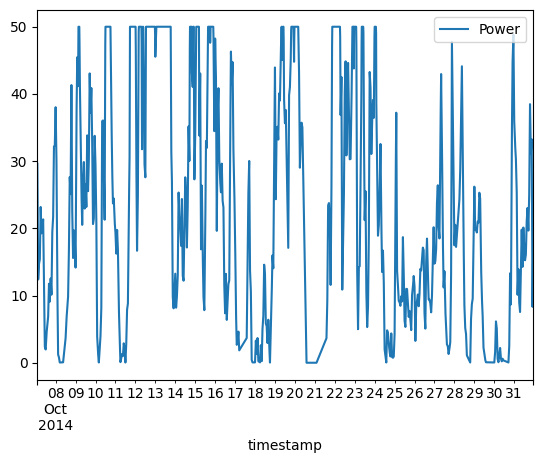

In [ ]:
df_.plot()

---


In [8]:
import pandas as pd
from pathlib import Path
import numpy as np

In [6]:
processed_dir = Path("../data/processed")
dfs = {}

for csv in processed_dir.glob("*.csv"):
    df = pd.read_csv(csv, parse_dates=["timestamp"], index_col="timestamp")
    dfs[csv.stem] = df

In [9]:
dfs.keys()

dict_keys(['residential_data_15min', 'industrial_data_15min', 'wind_15min', 'solar_15min', 'EV_15min'])

In [14]:
P_loads = np.vstack(
    (dfs["residential_data_15min"]["energy"], dfs["industrial_data_15min"]["energy"], dfs["EV_15min"]["energy"])
)

In [23]:
# Save P_loads as pickle
import pickle

with open("../data/processed/P_loads.pkl", "wb") as f:
    pickle.dump(P_loads, f)

In [28]:
P_maxs = np.vstack((dfs["solar_15min"]["Power"], dfs["wind_15min"]["Power"]))

In [29]:
# Save P_loads as pickle
import pickle

with open("../data/processed/P_maxs.pkl", "wb") as f:
    pickle.dump(P_maxs, f)

---


In [17]:
from pyvis.network import Network

# Tus datos de ejemplo (conjunto de tuplas)
edges = var = [
    (12.0, 4.0),
    (7.0, 17.0),
    (14.0, 13.0),
    (8.0, 9.0),
    (9.0, 8.0),
    (37.0, 33.0),
    (21.0, 0.0),
    (15.0, 14.0),
    (18.0, 10.0),
    (14.0, 15.0),
    (19.0, 11.0),
    (9.0, 10.0),
    (15.0, 16.0),
    (43.0, 32.0),
    (16.0, 15.0),
    (26.0, 25.0),
    (17.0, 7.0),
    (22.0, 21.0),
    (38.0, 39.0),
    (31.0, 42.0),
    (40.0, 38.0),
    (0.0, 2.0),
    (13.0, 5.0),
    (36.0, 34.0),
    (13.0, 14.0),
    (33.0, 26.0),
    (41.0, 39.0),
    (39.0, 41.0),
    (42.0, 31.0),
    (30.0, 29.0),
    (24.0, 25.0),
    (25.0, 24.0),
    (33.0, 37.0),
    (31.0, 30.0),
    (24.0, 0.0),
    (27.0, 26.0),
    (30.0, 31.0),
    (25.0, 26.0),
    (26.0, 27.0),
    (32.0, 43.0),
    (5.0, 4.0),
    (21.0, 22.0),
    (5.0, 13.0),
    (31.0, 32.0),
    (27.0, 28.0),
    (28.0, 27.0),
    (29.0, 28.0),
    (5.0, 6.0),
    (38.0, 40.0),
    (34.0, 36.0),
    (28.0, 29.0),
    (28.0, 38.0),
    (3.0, 2.0),
    (35.0, 34.0),
    (29.0, 30.0),
    (2.0, 3.0),
    (0.0, 24.0),
    (32.0, 31.0),
    (3.0, 4.0),
    (4.0, 3.0),
    (26.0, 33.0),
    (4.0, 12.0),
    (10.0, 9.0),
    (10.0, 18.0),
    (6.0, 5.0),
    (38.0, 28.0),
    (4.0, 5.0),
    (39.0, 38.0),
    (34.0, 33.0),
    (10.0, 11.0),
    (11.0, 10.0),
    (11.0, 19.0),
    (6.0, 7.0),
    (7.0, 6.0),
    (33.0, 34.0),
    (8.0, 7.0),
    (2.0, 0.0),
    (34.0, 35.0),
    (0.0, 21.0),
    (7.0, 8.0),
]

# Crear red (elige si es dirigido o no)

net = Network(directed=True, height="500px", width="100%")

# 1. Recopilar todos los nodos únicos y agregarlos a la red
nodes = set()
for edge in edges:
    nodes.add(edge[0])
    nodes.add(edge[1])

for node in nodes:
    net.add_node(str(node))  # Convertir a string para consistencia

# 2. Ahora agregar las aristas
for edge in edges:
    net.add_edge(str(edge[0]), str(edge[1]))  # Usar el mismo formato de nodo (string)

net.toggle_physics(True)
net.show_buttons(filter_=["physics"])
net.show("mi_grafo.html", notebook=False)

mi_grafo.html


In [15]:
edges

{(0.0, 2.0),
 (0.0, 37.0),
 (0.0, 38.0),
 (0.0, 39.0),
 (1.0, 3.0),
 (2.0, 0.0),
 (2.0, 4.0),
 (3.0, 1.0),
 (3.0, 5.0),
 (4.0, 2.0),
 (4.0, 6.0),
 (4.0, 9.0),
 (5.0, 3.0),
 (5.0, 7.0),
 (5.0, 10.0),
 (6.0, 4.0),
 (6.0, 8.0),
 (7.0, 5.0),
 (7.0, 9.0),
 (7.0, 14.0),
 (8.0, 6.0),
 (8.0, 10.0),
 (9.0, 4.0),
 (9.0, 7.0),
 (10.0, 5.0),
 (10.0, 8.0),
 (10.0, 15.0),
 (11.0, 13.0),
 (11.0, 16.0),
 (12.0, 14.0),
 (13.0, 11.0),
 (13.0, 15.0),
 (14.0, 7.0),
 (14.0, 12.0),
 (15.0, 10.0),
 (15.0, 13.0),
 (16.0, 11.0),
 (17.0, 21.0),
 (18.0, 24.0),
 (19.0, 25.0),
 (20.0, 26.0),
 (21.0, 17.0),
 (21.0, 27.0),
 (22.0, 28.0),
 (23.0, 29.0),
 (24.0, 18.0),
 (24.0, 30.0),
 (25.0, 19.0),
 (25.0, 31.0),
 (26.0, 20.0),
 (26.0, 26.0),
 (27.0, 21.0),
 (27.0, 33.0),
 (28.0, 22.0),
 (28.0, 31.0),
 (28.0, 34.0),
 (29.0, 23.0),
 (29.0, 34.0),
 (30.0, 24.0),
 (30.0, 33.0),
 (31.0, 25.0),
 (31.0, 28.0),
 (31.0, 35.0),
 (32.0, 36.0),
 (32.0, 38.0),
 (33.0, 27.0),
 (33.0, 30.0),
 (33.0, 38.0),
 (34.0, 28.0),
 (34.0, 29